# ARABIDOPSIS

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')

# Data load

In [2]:
arabidopsis = pd.read_csv("./data_arabidopsis.csv", sep=",") 

# Data Smoothing

In [3]:
sdata = arabidopsis
sdata['sCG'] = 0 
sdata['sCHG'] = 0 
sdata['sCHH'] = 0 
sdata['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(sdata)):
    if sdata.loc[i-1,'chr'] == sdata.loc[i,'chr']:
        sdata.loc[i, 'sCG'] = sdata.loc[i-1, 'CG']*0.1 + sdata.loc[i-1, 'sCG']*0.9
        sdata.loc[i, 'sCHG'] = sdata.loc[i-1, 'CHG']*0.1 + sdata.loc[i-1, 'sCHG']*0.9
        sdata.loc[i, 'sCHH'] = sdata.loc[i-1, 'CHH']*0.1 + sdata.loc[i-1, 'sCHH']*0.9  
        sdata.loc[i, 'srec'] = sdata.loc[i-1, 'rec']*0.1 + sdata.loc[i-1, 'srec']*0.9  

# Object Creation

In [4]:
# Dataframes with chromosomes info
chr1 = sdata[sdata["chr"] == "chr1"]
chr2 = sdata[sdata["chr"] == "chr2"]
chr3 = sdata[sdata["chr"] == "chr3"]
chr4 = sdata[sdata["chr"] == "chr4"]
chr5 = sdata[sdata["chr"] == "chr5"]

In [5]:
# Dataframes with all the remaining chromosomes info
achr1 = sdata[sdata["chr"] != "chr1"]
achr2 = sdata[sdata["chr"] != "chr2"]
achr3 = sdata[sdata["chr"] != "chr3"]
achr4 = sdata[sdata["chr"] != "chr4"]
achr5 = sdata[sdata["chr"] != "chr5"]

# Predictions on one chromosome using the remaining

Correlation: 0.4460248961524308
Coefficient of Determination: 0.1487087495539724
Mean Squared Error: 0.02283150456490989


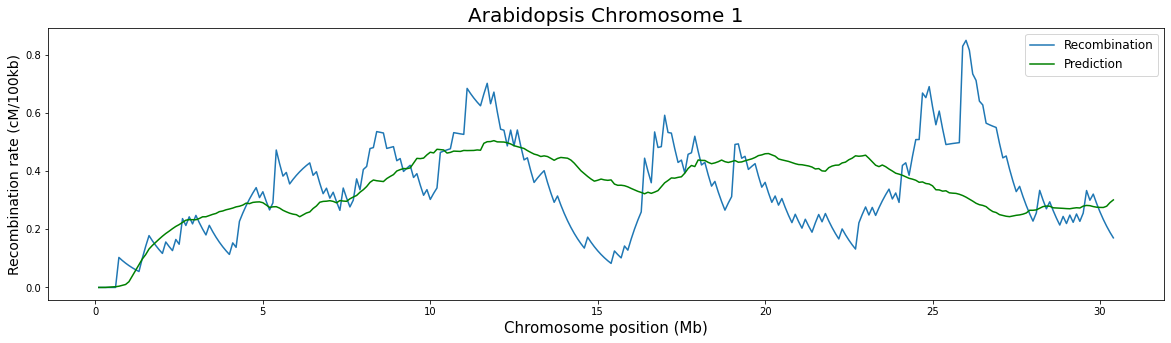

In [6]:
# TRAINING MODEL
X = achr1[['sCG','sCHG','sCHH']]
y = achr1[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr1[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr1 = model_spreds      
    
#PARAMETERS
corr_chr1 = pearsonr(chr1.srec, pchr1)
r2_chr1 = r2_score(chr1.srec, pchr1)
mse_chr1 = mean_squared_error(chr1.srec, pchr1)
print('Correlation:', corr_chr1[0])
print('Coefficient of Determination:', r2_chr1)
print('Mean Squared Error:', mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr1.window_end,chr1.srec, label='Recombination')
ax.plot(chr1.window_end,pchr1, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 1',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.14421884669608942
Coefficient of Determination: -0.4264015804975574
Mean Squared Error: 0.02303247552376103


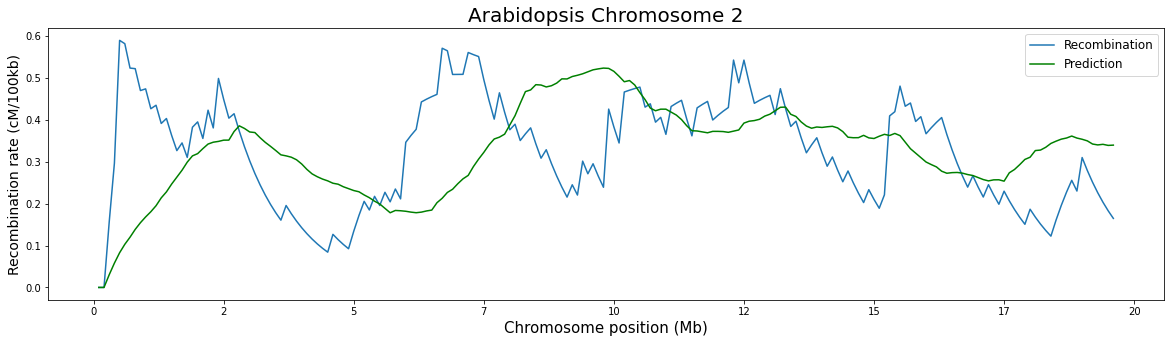

In [7]:
# TRAINING MODEL
X = achr2[['sCG','sCHG','sCHH']]
y = achr2[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr2[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr2 = model_spreds      
    
#PARAMETERS
corr_chr2 = pearsonr(chr2.srec, pchr2)
r2_chr2 = r2_score(chr2.srec, pchr2)
mse_chr2 = mean_squared_error(chr2.srec, pchr2)
print('Correlation:', corr_chr2[0])
print('Coefficient of Determination:', r2_chr2)
print('Mean Squared Error:', mse_chr2)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr2.window_end,chr2.srec, label='Recombination')
ax.plot(chr2.window_end,pchr2, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 2',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.25453111090711195
Coefficient of Determination: -0.1594279556389624
Mean Squared Error: 0.037564678227354466


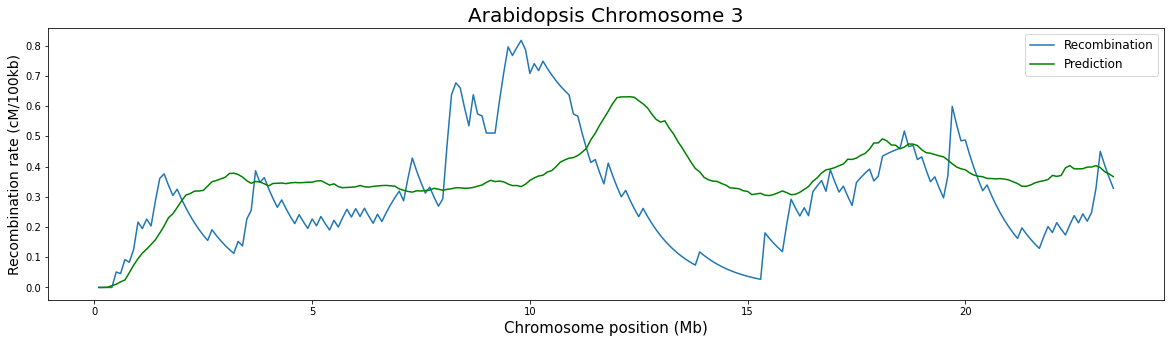

In [8]:
# TRAINING MODEL
X = achr3[['sCG','sCHG','sCHH']]
y = achr3[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr3[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr3 = model_spreds      
    
#PARAMETERS
corr_chr3 = pearsonr(chr3.srec, pchr3)
r2_chr3 = r2_score(chr3.srec, pchr3)
mse_chr3 = mean_squared_error(chr3.srec, pchr3)
print('Correlation:', corr_chr3[0])
print('Coefficient of Determination:', r2_chr3)
print('Mean Squared Error:', mse_chr3)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr3.window_end,chr3.srec, label='Recombination')
ax.plot(chr3.window_end,pchr3, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 3',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.10581189682719583
Coefficient of Determination: -0.44576889609553993
Mean Squared Error: 0.054100923101369804


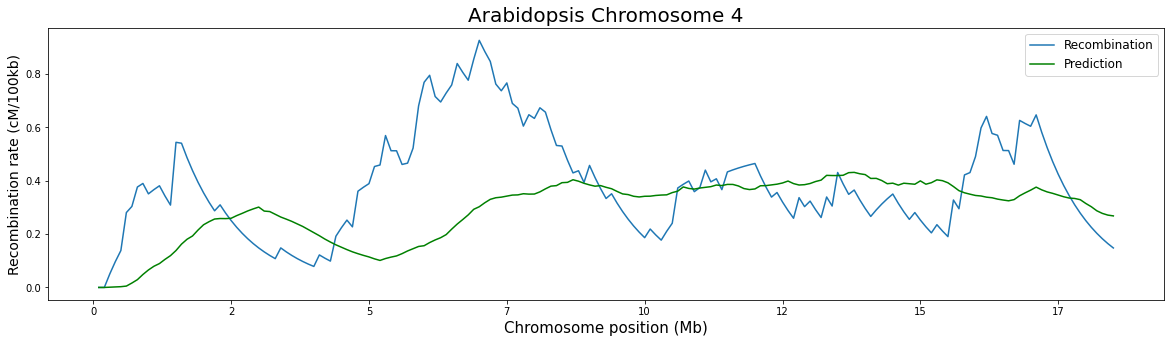

In [9]:
# TRAINING MODEL
X = achr4[['sCG','sCHG','sCHH']]
y = achr4[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr4[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr4 = model_spreds      
    
#PARAMETERS
corr_chr4 = pearsonr(chr4.srec, pchr4)
r2_chr4 = r2_score(chr4.srec, pchr4)
mse_chr4 = mean_squared_error(chr4.srec, pchr4)
print('Correlation:', corr_chr4[0])
print('Coefficient of Determination:', r2_chr4)
print('Mean Squared Error:', mse_chr4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr4.window_end,chr4.srec, label='Recombination')
ax.plot(chr4.window_end,pchr4, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 4',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.5009705615118215
Coefficient of Determination: 0.24850226369868078
Mean Squared Error: 0.016332980315527657


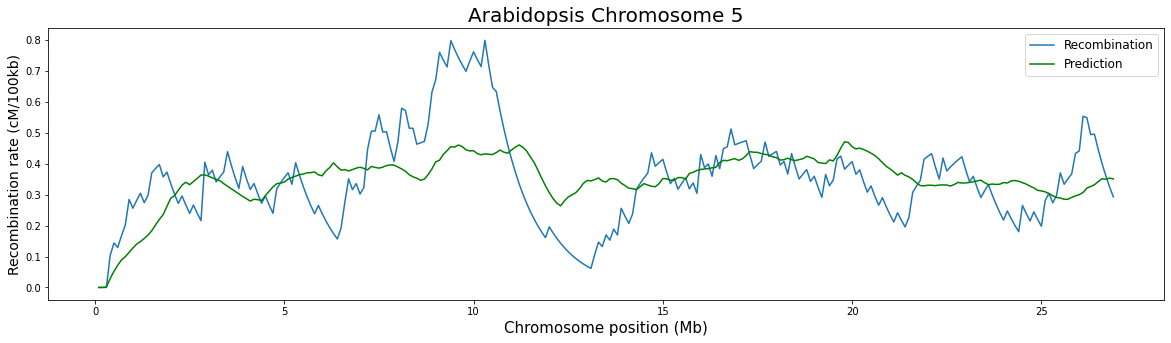

In [10]:
# TRAINING MODEL
X = achr5[['sCG','sCHG','sCHH']]
y = achr5[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(chr5[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr5 = model_spreds      
    
#PARAMETERS
corr_chr5 = pearsonr(chr5.srec, pchr5)
r2_chr5 = r2_score(chr5.srec, pchr5)
mse_chr5 = mean_squared_error(chr5.srec, pchr5)
print('Correlation:', corr_chr5[0])
print('Coefficient of Determination:', r2_chr5)
print('Mean Squared Error:', mse_chr5)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(chr5.window_end,chr5.srec, label='Recombination')
ax.plot(chr5.window_end,pchr5, label = 'Prediction',  color ='green')
plt.title('Arabidopsis Chromosome 5',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

# Compiling Info

In [11]:
corr = pd.DataFrame({'corr':[corr_chr1[0], corr_chr2[0], corr_chr3[0], corr_chr4[0], corr_chr5[0]]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5',]})
results = pd.concat([index, corr, r2, mse], axis=1)
results

,chr,corr,R^2,MSE
0,chr1,0.446025,0.148709,0.022832
1,chr2,0.144219,-0.426402,0.023032
2,chr3,0.254531,-0.159428,0.037565
3,chr4,0.105812,-0.445769,0.054101
4,chr5,0.500971,0.248502,0.016333


In [12]:
results.describe()

,corr,R^2,MSE
count,5.000000,5.000000,5.000000
mean,0.290311,-0.126877,0.030773
std,0.176980,0.319892,0.015181
min,0.105812,-0.445769,0.016333
25%,0.144219,-0.426402,0.022832
50%,0.254531,-0.159428,0.023032
75%,0.446025,0.148709,0.037565
max,0.500971,0.248502,0.054101


# SHAP Values

In [13]:
#-------------------------------------------------------------------------------------------------------
X = sdata[['sCG', 'sCHG', 'sCHH']]
y = sdata['srec']

X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

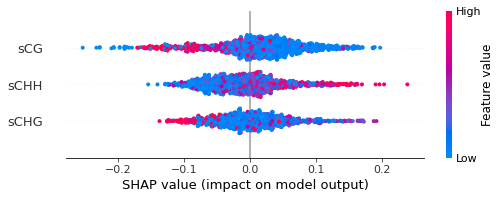

In [14]:
X_frame = pd.DataFrame(data=X)
explainer = shap.Explainer(model)
shap_values = explainer(X_frame)
shap.summary_plot(shap_values, X_frame)

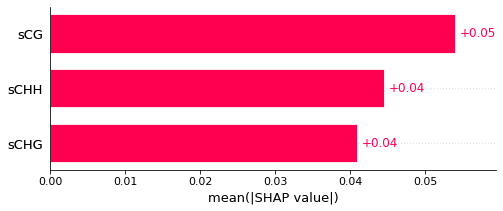

In [15]:
shap.plots.bar(shap_values)